**Using Test Data**

In [1]:
import os
import warnings
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pyart
from pyart.testing import get_test_data
warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
pyart.io.read?

Signature: pyart.io.read(filename, use_rsl=False, **kwargs)
Docstring:
Read a radar file and return a radar object.

Additional parameters are passed to the underlying read_* function.

Parameters
----------
filename : str
    Name of radar file to read.
use_rsl : bool
    True will use the TRMM RSL library to read files which are supported
    both natively and by RSL. False will choose the native read function.
    RSL will always be used to read a file if it is not supported
    natively.

Other Parameters
-------------------
field_names : dict, optional
    Dictionary mapping file data type names to radar field names. If a
    data type found in the file does not appear in this dictionary or has
    a value of None it will not be placed in the radar.fields dictionary.
    A value of None, the default, will use the mapping defined in the
    metadata configuration file.
additional_metadata : dict of dicts, optional
    Dictionary of dictionaries to retrieve metadata from during this

In [3]:
file = get_test_data('swx_20120520_0641.nc')
radar = pyart.io.read(file)
radar

In [4]:
radar.fields.keys()

dict_keys(['corrected_reflectivity_horizontal', 'reflectivity_horizontal', 'recalculated_diff_phase', 'specific_attenuation', 'unf_dp_phase_shift', 'mean_doppler_velocity', 'diff_phase', 'rain_rate_A', 'norm_coherent_power', 'dp_phase_shift', 'diff_reflectivity', 'proc_dp_phase_shift', 'copol_coeff'])

In [5]:
print(radar.fields['diff_phase'])

{'_FillValue': -9999.0, 'least_significant_digit': 2, 'units': 'degrees/km', 'long_name': 'specific_differential_phase_hv', 'standard_name': 'specific_differential_phase_hv', 'valid_max': 20.0, 'valid_min': -10.0, 'data': masked_array(
  data=[[0.0, 0.0, 0.0, ..., --, --, --],
        [0.0, 0.0, 0.0, ..., --, --, --],
        [0.0, 0.0, 0.0, ..., --, --, --],
        ...,
        [0.0, 0.0, 0.0, ..., --, --, --],
        [0.0, 0.0, 0.0, ..., --, --, --],
        [0.0, 0.0, 0.0, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=-9999.0,
  dtype=float32)}


In [6]:
refl = radar.fields['corrected_reflectivity_horizontal']['data']
print(type(refl), refl)

<class 'numpy.ma.core.MaskedArray'> [[-5.671875 2.28125 -8.1171875 ... -- -13.4765625 --]
 [-5.6171875 1.8984375 -10.0703125 ... -2.6796875 -1.5390625 --]
 [-5.0390625 2.625 -11.484375 ... -8.984375 -- --]
 ...
 [-5.9375 1.46875 -12.3203125 ... -- -- --]
 [-5.9609375 1.53125 -12.84375 ... -- -- --]
 [-8.7890625 2.9140625 -12.09375 ... -- -- --]]


In [7]:
refl.shape

(8800, 667)

In [8]:
print(radar.nrays, radar.ngates)

8800 667


In [9]:
print(refl[400,5])

28.023438


In [10]:
fig = plt.figure(figsize=(10,10))
display = pyart.graph.RadarMapDisplay(radar)

<Figure size 1000x1000 with 0 Axes>

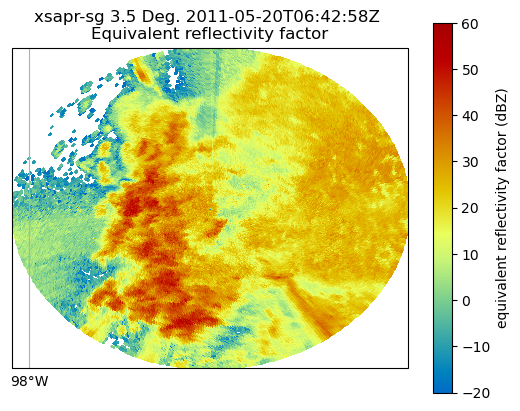

In [11]:
display.plot_ppi_map('corrected_reflectivity_horizontal', cmap='pyart_HomeyerRainbow', 
                     vmin=-20, vmax=60, sweep=3, projection=ccrs.PlateCarree())

**Dealiasing**

In [12]:
file = get_test_data('110635.mdv')
radar = pyart.io.read(file)

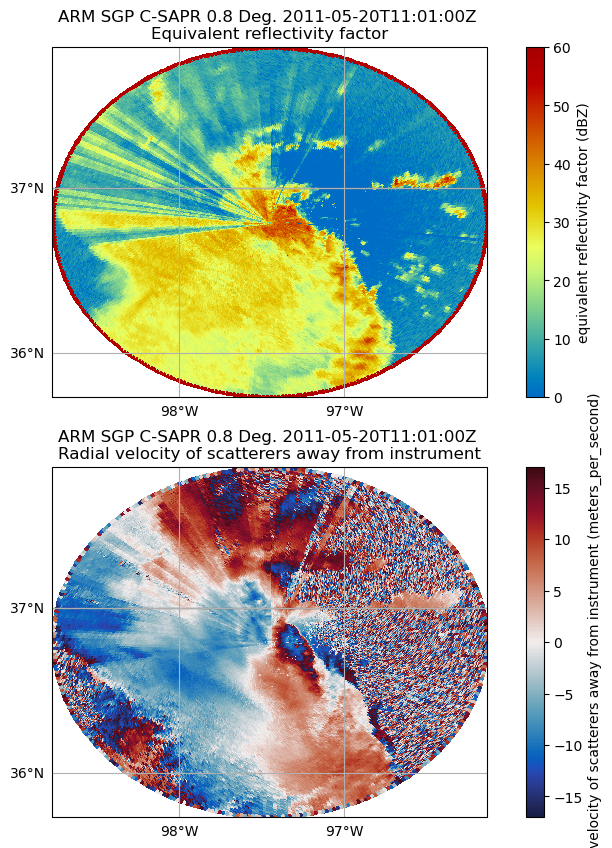

In [13]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(2,1,1, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity',ax=ax,
                    sweep=0, resolution='50m',
                    vmin=0, vmax=60,
                    projection=ccrs.PlateCarree(),
                    cmap='pyart_HomeyerRainbow')

ax2 = plt.subplot(2,1,2, projection=ccrs.PlateCarree())
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('velocity', ax=ax2,
                    sweep=0, resolution='50m',
                    vmin=-17, vmax=17,
                    projection=ccrs.PlateCarree(),
                    cmap='pyart_balance')

In [14]:
pyart.retrieve.calculate_velocity_texture?

Signature:
pyart.retrieve.calculate_velocity_texture(
    radar,
    vel_field=None,
    wind_size=4,
    nyq=None,
    check_nyq_uniform=True,
)
Docstring:
Derive the texture of the velocity field.

Parameters
----------
radar: Radar
    Radar object from which velocity texture field will be made.
vel_field : str, optional
    Name of the velocity field. A value of None will force Py-ART to
    automatically determine the name of the velocity field.
wind_size : int, optional
    The size of the window to calculate texture from. The window is
    defined to be a square of size wind_size by wind_size.
nyq : float, optional
    The nyquist velocity of the radar. A value of None will force Py-ART
    to try and determine this automatically.
check_nyquist_uniform : bool, optional
    True to check if the Nyquist velocities are uniform for all rays
    within a sweep, False will skip this check. This parameter is ignored
    when the nyq parameter is not None.

Returns
-------
vel_dict: dic

In [15]:
nyquist_velocity = radar.instrument_parameters['nyquist_velocity']['data']
nyquist_velocity

array([16.52468, 16.52468, 16.52468, ..., 16.52468, 16.52468, 16.52468],
      dtype=float32)

In [16]:
import numpy as np
np.unique(nyquist_velocity)

array([16.52468], dtype=float32)

In [17]:
nyquist_value = np.unique(nyquist_velocity)[0]

In [18]:
vel_texture = pyart.retrieve.calculate_velocity_texture(radar,
                                                        vel_field='velocity',
                                                        nyq=nyquist_value)
vel_texture

{'units': 'meters_per_second',
 'standard_name': 'texture_of_radial_velocity_of_scatters_away_from_instrument',
 'long_name': 'Doppler velocity texture',
 'coordinates': 'elevation azimuth range',
 'data': array([[7.51300375, 6.08543553, 5.92741611, ..., 5.84680145, 5.87766469,
         5.8796826 ],
        [7.51300375, 5.92741611, 5.52273606, ..., 5.84680145, 5.87766469,
         5.8796826 ],
        [6.31927866, 5.92741611, 5.52273606, ..., 5.94545992, 5.98767892,
         5.99355426],
        ...,
        [7.28154521, 7.17077244, 5.99292346, ..., 5.69339285, 5.64166993,
         5.64166993],
        [7.77209257, 7.77209257, 5.95091982, ..., 5.48500863, 5.42860475,
         5.42860475],
        [7.99320448, 7.99320448, 5.95091982, ..., 2.32524392, 2.33743921,
         2.3474649 ]])}

In [19]:
radar.add_field('texture', vel_texture, replace_existing=True)

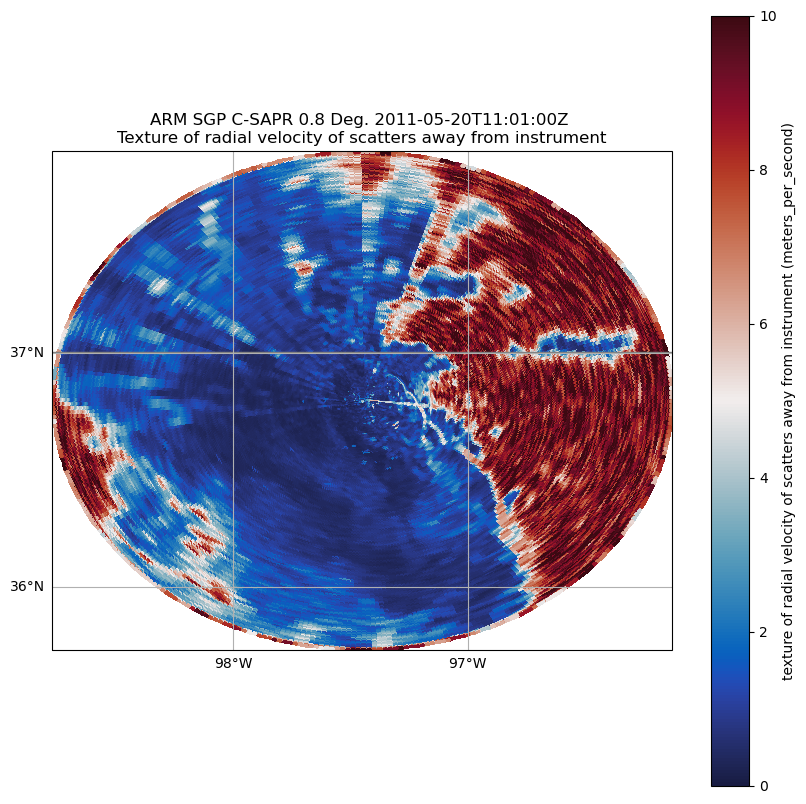

In [20]:
fig = plt.figure(figsize=(10,10))
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('texture',
                    sweep=0, resolution='50m',
                    vmin=0, vmax=10,
                    projection=ccrs.PlateCarree(),
                    cmap='pyart_balance')

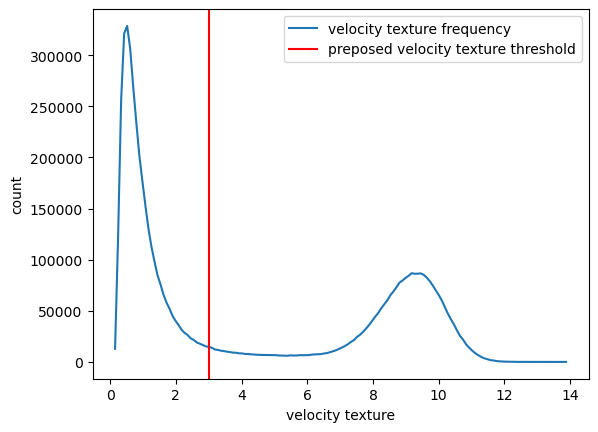

In [21]:
hist, bins = np.histogram(radar.fields['texture']['data'], bins=150)
bins = (bins[1:]+bins[:-1])/2

plt.plot(bins, hist, label='velocity texture frequency')
plt.axvline(3, color='r', label='preposed velocity texture threshold')
plt.xlabel('velocity texture')
plt.ylabel('count')
plt.legend()

In [22]:
gatefilter = pyart.filters.GateFilter(radar)
gatefilter

In [23]:
gatefilter.exclude_above('texture', 3) # gets rid of noise

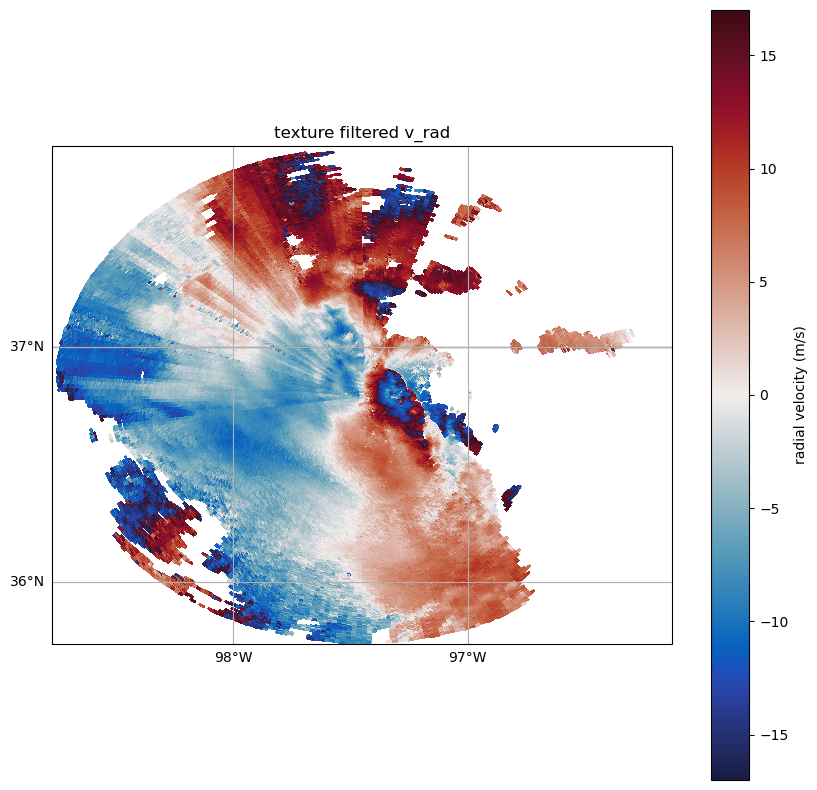

In [24]:
fig = plt.figure(figsize=(10,10))
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('velocity', sweep=0, title='texture filtered v_rad',
                    resolution='50m', vmin=-17, vmax=17,
                    projection=ccrs.PlateCarree(),
                    colorbar_label='radial velocity (m/s)',
                    cmap='pyart_balance', gatefilter=gatefilter)

In [25]:
velocity_dealiased = pyart.correct.dealias_region_based(radar,
                                                        nyquist_vel=nyquist_value,
                                                        centered=True,
                                                        gatefilter=gatefilter)
radar.add_field('corrected_velocity', velocity_dealiased, replace_existing=True)
# now we are filtered AND dealiased

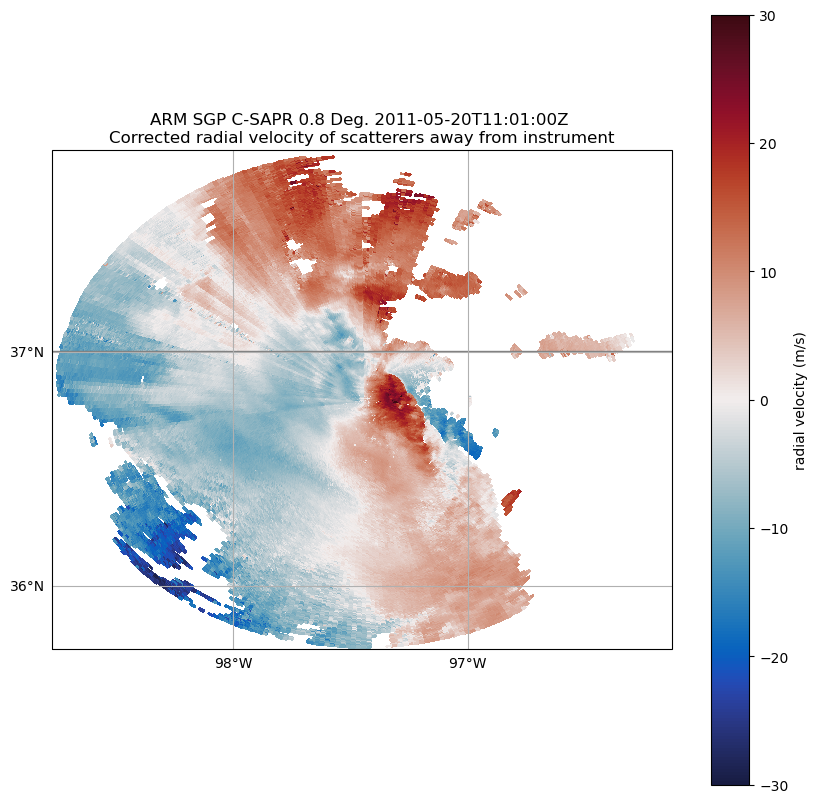

In [26]:
fig = plt.figure(figsize=(10,10))
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('corrected_velocity',
                   sweep=0, resolution='50m',
                   vmin=-30, vmax=30,
                   projection=ccrs.PlateCarree(),
                   colorbar_label='radial velocity (m/s)',
                   cmap='pyart_balance', gatefilter=gatefilter)

**Gridding**

In [27]:
file = get_test_data('swx_20120520_0641.nc')
radar = pyart.io.read(file)

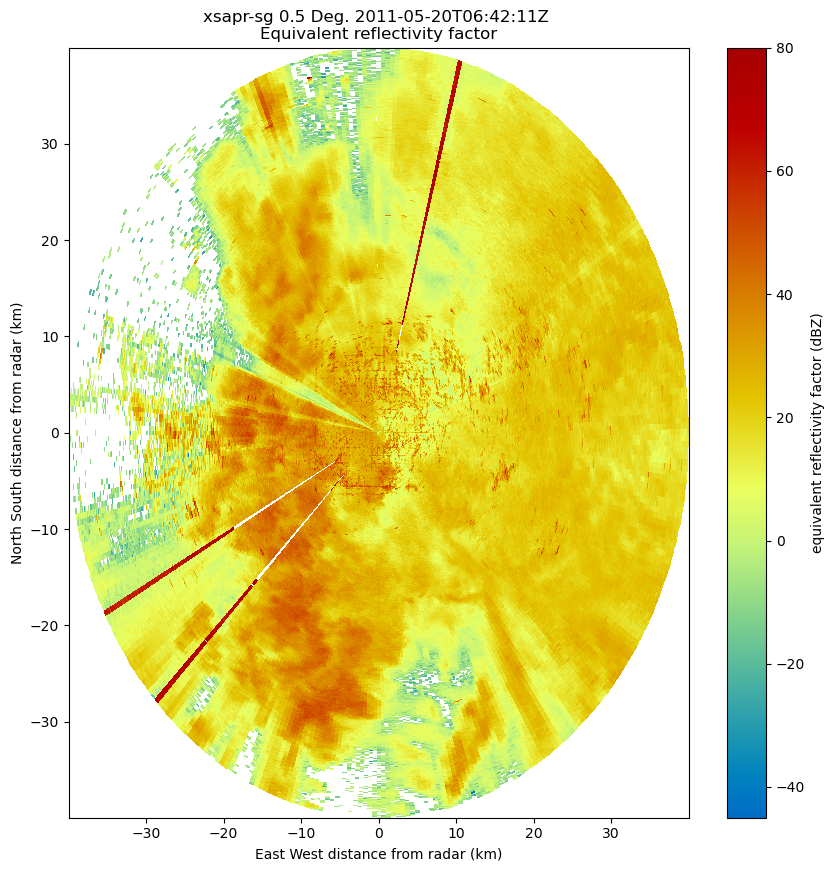

In [30]:
fig = plt.figure(figsize=(10,10))
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('corrected_reflectivity_horizontal', cmap='pyart_HomeyerRainbow')

In [31]:
pyart.core.Grid?

Init signature:
pyart.core.Grid(
    time,
    fields,
    metadata,
    origin_latitude,
    origin_longitude,
    origin_altitude,
    x,
    y,
    z,
    projection=None,
    radar_latitude=None,
    radar_longitude=None,
    radar_altitude=None,
    radar_time=None,
    radar_name=None,
)
Docstring:     
A class for storing rectilinear gridded radar data in Cartesian coordinate.

Refer to the attribute section for information on the parameters.

To create a Grid object using legacy parameters present in Py-ART version
1.5 and before, use :py:func:`from_legacy_parameters`,
grid = Grid.from_legacy_parameters(fields, axes, metadata).

Attributes
----------
time : dict
    Time of the grid.
fields : dict of dicts
    Moments from radars or other variables.
metadata : dict
    Metadata describing the grid.
origin_longitude, origin_latitude, origin_altitude : dict
    Geographic coordinate of the origin of the grid.
x, y, z : dict, 1D
    Distance from the grid origin for each Cartesian

In [32]:
z_grid_limits = (500, 15_000)
y_grid_limits = (-20_000, 20_000)
x_grid_limits = (-20_000, 20_000)

In [33]:
grid_resolution = 500

In [34]:
def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)

In [35]:
z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
y_grid_points = compute_number_of_points(y_grid_limits, grid_resolution)
x_grid_points = compute_number_of_points(x_grid_limits, grid_resolution)

In [37]:
print(z_grid_points, y_grid_points, x_grid_points)

29 80 80


In [38]:
grid = pyart.map.grid_from_radars(radar,
                                 grid_shape=(z_grid_points, y_grid_points, x_grid_points),
                                 grid_limits=(z_grid_limits, y_grid_limits, x_grid_limits))
grid

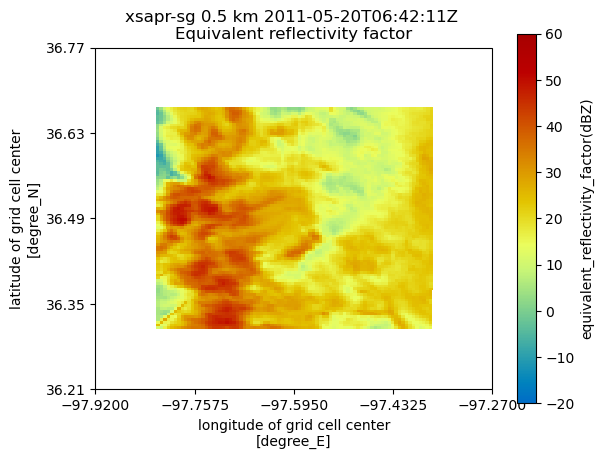

In [40]:
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('corrected_reflectivity_horizontal',
                 level=0,
                 vmin=-20, vmax=60,
                 cmap='pyart_HomeyerRainbow')

(-20.0, 20.0)

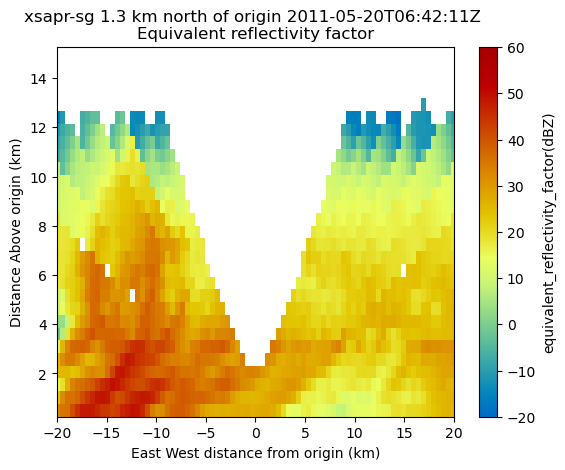

In [41]:
display.plot_latitude_slice('corrected_reflectivity_horizontal',
                           lat=36.5,vmin=-20,vmax=60,
                           cmap='pyart_HomeyerRainbow')
plt.xlim([-20, 20])

In [42]:
import xarray as xr

In [43]:
ds = grid.to_xarray()

In [44]:
ds

<xarray.Dataset>
Dimensions:                            (time: 1, z: 29, y: 80, x: 80)
Coordinates:
  * time                               (time) object 2011-05-20 06:42:11
  * z                                  (z) float64 500.0 1.018e+03 ... 1.5e+04
    lat                                (y, x) float64 36.31 36.31 ... 36.67
    lon                                (y, x) float64 -97.82 -97.81 ... -97.37
  * y                                  (y) float64 -2e+04 -1.949e+04 ... 2e+04
  * x                                  (x) float64 -2e+04 -1.949e+04 ... 2e+04
Data variables: (12/14)
    copol_coeff                        (time, z, y, x) float32 0.5355 ... nan
    norm_coherent_power                (time, z, y, x) float32 0.2725 ... 0.0...
    mean_doppler_velocity              (time, z, y, x) float32 -11.43 ... 1.22
    diff_reflectivity                  (time, z, y, x) float32 0.0 0.0 ... 0.0
    unf_dp_phase_shift                 (time, z, y, x) float32 66.88 ... 42.07
    reflectivity_horizontal            (time, z, y, x) float32 -3.618 ... nan
    ...                                 ...
    diff_phase                         (time, z, y, x) float32 0.3938 ... nan
    corrected_reflectivity_horizontal  (time, z, y, x) float32 11.35 ... nan
    rain_rate_A                        (time, z, y, x) float32 0.7812 ... 0.0
    recalculated_diff_phase            (time, z, y, x) float32 0.3767 ... 0.0...
    proc_dp_phase_shift                (time, z, y, x) float32 67.05 ... 42.07
    ROI                                (time, z, y, x) float32 765.6 ... 1.49...

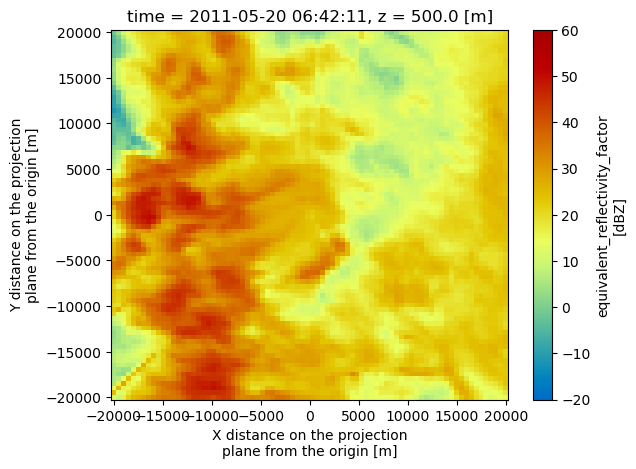

In [47]:
ds.isel(z=0).corrected_reflectivity_horizontal.plot(cmap='pyart_HomeyerRainbow',
                                                  vmin=-20,vmax=60)

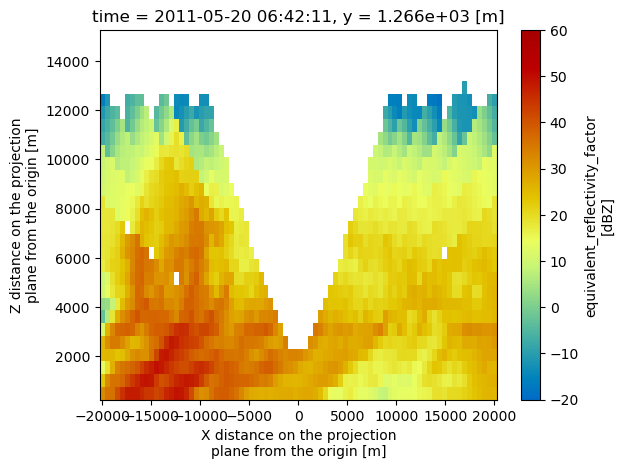

In [48]:
ds.sel(y=1300, method='nearest').corrected_reflectivity_horizontal.plot(cmap='pyart_HomeyerRainbow',
                                                                       vmin=-20,vmax=60)